In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import LinearSVR as L_SVR
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras import layers, models

In [2]:
df = pd.read_csv('song_data.csv')
sh1, sh2 = df.shape
print(sh1, sh2)
df.drop(['song_name'], axis=1, inplace=True)
df.drop(['instrumentalness'], axis=1, inplace=True)

target = 'song_popularity'
features = [i for i in df.columns if i not in [target, 'key', 'time_signature', 'audio_mode']]
df.head()

18835 15


,song_popularity,song_duration_ms,acousticness,danceability,energy,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


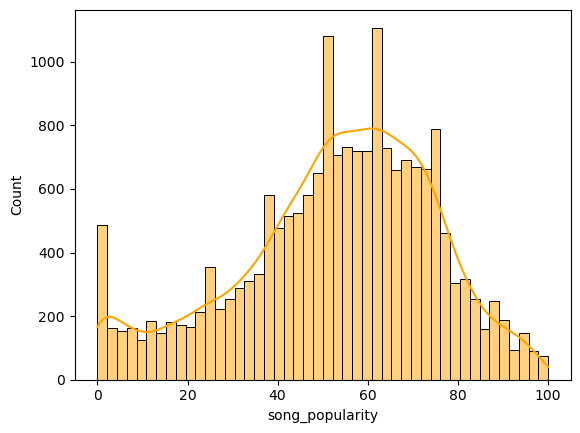

In [3]:
sns.histplot(x=df['song_popularity'], color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [4]:
df.nunique()
#print(df['song_popularity'].min())
#print(df['song_popularity'].max())

song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

In [5]:
count = df[df.columns].nunique()
cat = []
for i in range(len(df.columns)):
    if count.values[i] < 16:
        cat.append(count.index[i])
print(cat)

['key', 'audio_mode', 'time_signature']


In [6]:
#med_abs_of_med = []
#for i in df.columns:
#    med = df[i].median()
#    abs = []
#    for j in range(18835):
#        abs.append(df.loc[j, i] - med)
#    med_abs_of_med.append(abs.median())

#дисперсии
disp = []
for i in df.columns:
    mean = df[i].mean()
    di= 0
    for j in range(18835):
        di += (df.loc[j, i] - mean)**2
    disp.append(di/18835)
print(disp)

[479.8322143432086, 3586327097.3704386, 0.08335418267597083, 0.02456070220214241, 0.045836700179970685, 13.064600547600612, 0.020730339150822567, 14.651513650244876, 0.23358037035046963, 0.010894288732441923, 824.4761916423454, 0.08911714201173429, 0.05984148532432241]


9


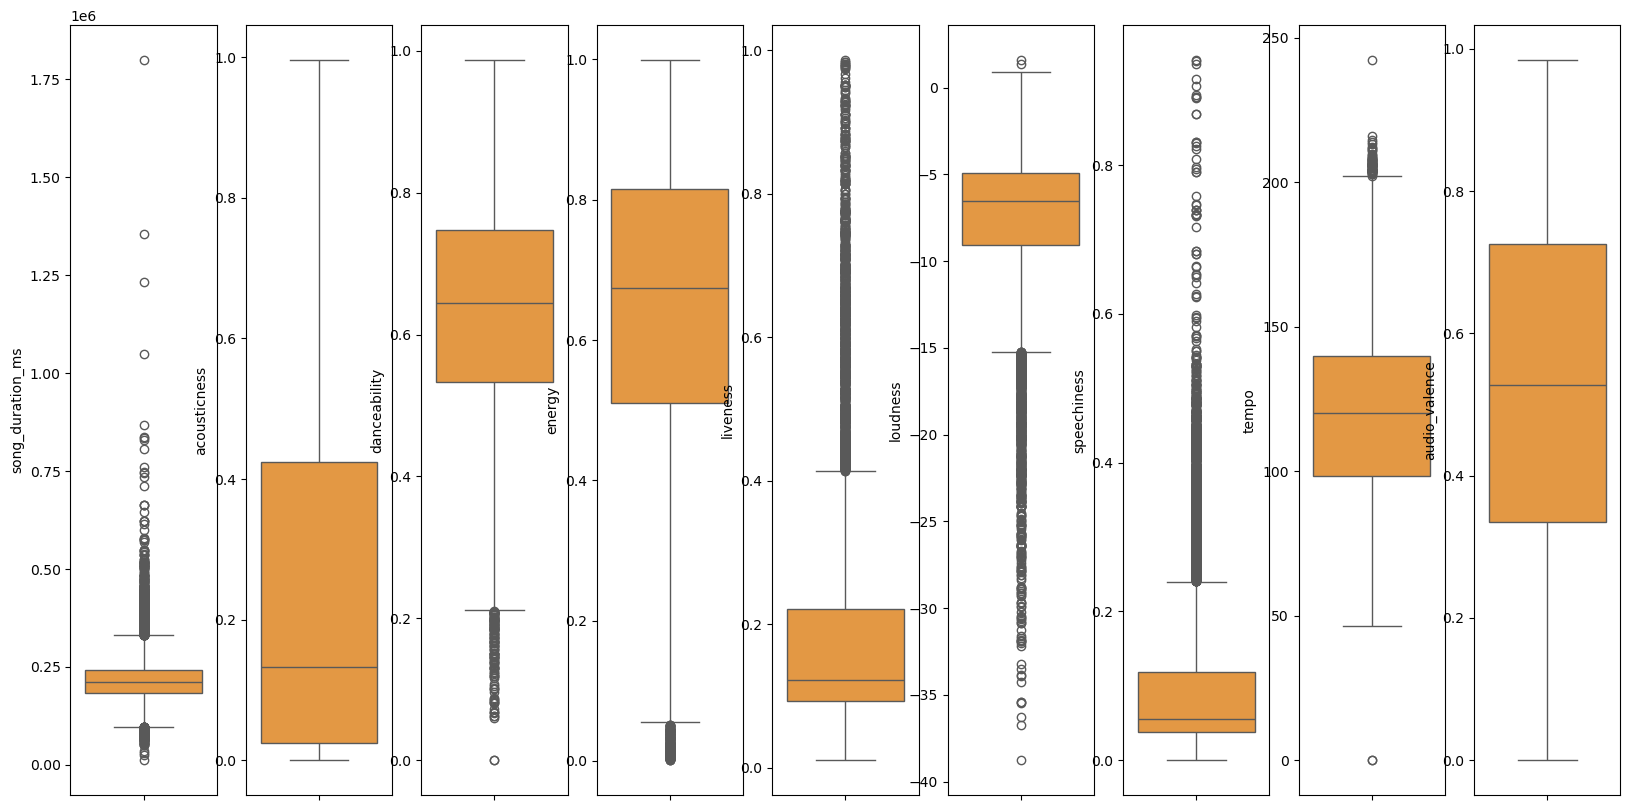

In [7]:
cont_features = [col for col in features if df[col].nunique() >= 15]
print(len(cont_features))
fig, ax = plt.subplots(1, 9, figsize=(20, 10))
 
for i in range(9):
    sns.boxplot(y=df[cont_features[i]], ax=ax[i], color="#fe9929")
    
    

plt.show()

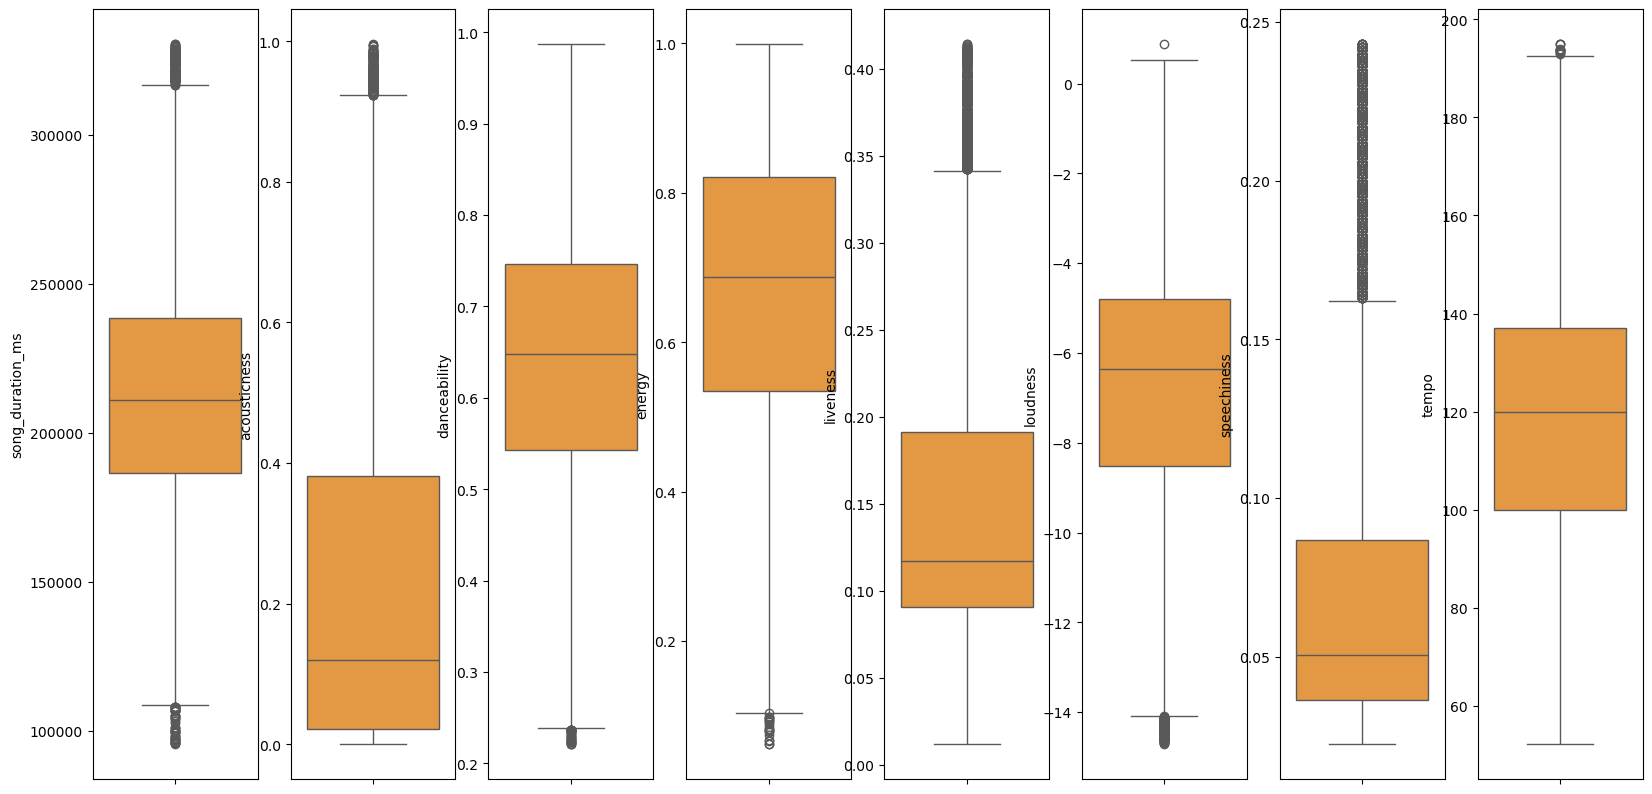

In [8]:
for i in cont_features:
    diff = df[i].quantile(0.75) - df[i].quantile(0.25)
    df = df[df[i] <= (df[i].quantile(0.75) + (3/2*diff))]
    df = df[df[i] >= (df[i].quantile(0.25) - (1.5*diff))]
fig, ax = plt.subplots(1, 8, figsize=(20, 10))
 
for i in range(8):
    sns.boxplot(y=df[cont_features[i]], ax=ax[i], color="#fe9929")
    
    

plt.show()

In [9]:
#df.drop_duplicates(inplace=True)
print(sh1, sh2, df.shape)
print(sh1 - df.shape[0])
df.isnull().sum().sort_values()

18835 15 (14198, 13)
4637


song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [10]:
df.isna().sum().sort_values()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14198 entries, 0 to 18834
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14198 non-null  int64  
 1   song_duration_ms  14198 non-null  int64  
 2   acousticness      14198 non-null  float64
 3   danceability      14198 non-null  float64
 4   energy            14198 non-null  float64
 5   key               14198 non-null  int64  
 6   liveness          14198 non-null  float64
 7   loudness          14198 non-null  float64
 8   audio_mode        14198 non-null  int64  
 9   speechiness       14198 non-null  float64
 10  tempo             14198 non-null  float64
 11  time_signature    14198 non-null  int64  
 12  audio_valence     14198 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 1.5 MB


In [12]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000,14198.000000
mean,53.588322,213772.597126,0.237732,0.638533,0.664185,5.291661,0.151382,-6.865710,0.635512,0.071317,120.448633,3.964079,0.538171
std,22.003907,41743.289325,0.270003,0.145803,0.194538,3.602915,0.089523,2.785676,0.481303,0.050696,26.428391,0.262690,0.243626
min,0.000000,95600.000000,0.000001,0.221000,0.061800,0.000000,0.011900,-14.714000,0.000000,0.022400,52.181000,1.000000,0.030100
25%,41.000000,186580.000000,0.021125,0.543000,0.534000,2.000000,0.090400,-8.513000,0.000000,0.036300,99.975000,4.000000,0.343000
50%,56.000000,211099.000000,0.120000,0.648000,0.687000,5.000000,0.117000,-6.350000,1.000000,0.050500,120.003000,4.000000,0.536000
75%,69.000000,238726.000000,0.382000,0.746000,0.821000,8.000000,0.191000,-4.797000,1.000000,0.086600,137.051000,4.000000,0.737000
max,100.000000,330533.000000,0.996000,0.987000,0.999000,11.000000,0.414000,0.878000,1.000000,0.243000,194.950000,5.000000,0.984000


IndexError: list index out of range

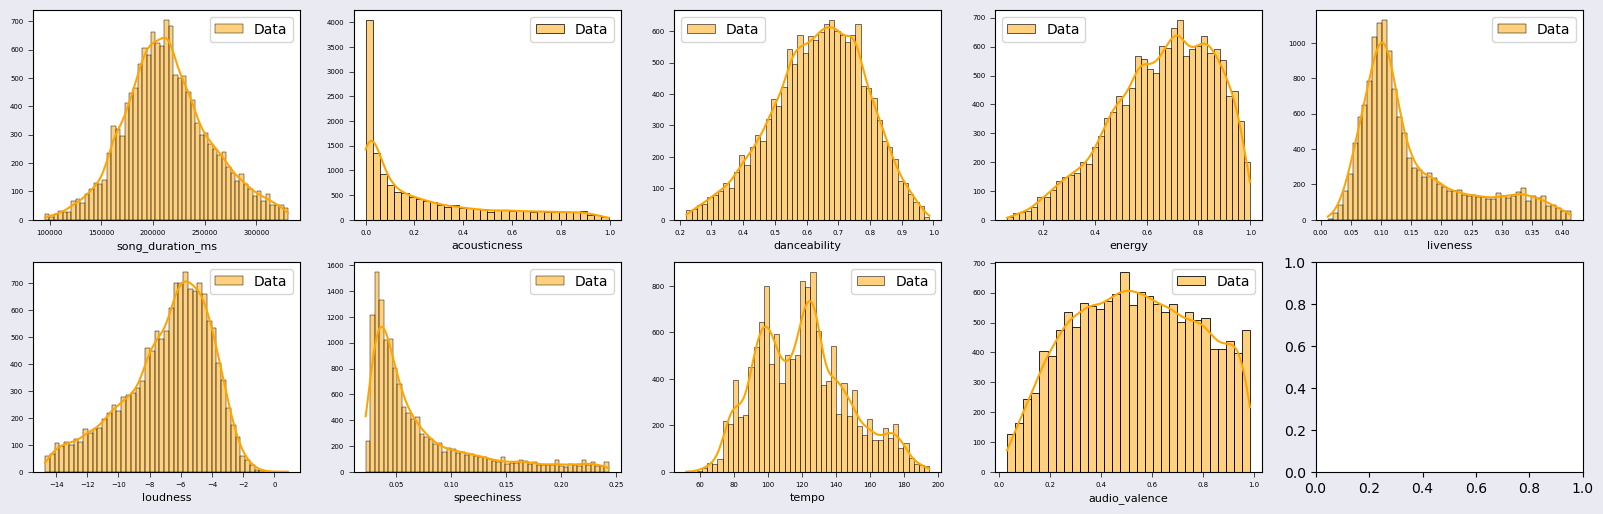

In [13]:
ncols = 5
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 6), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = features[r*ncols+c]
        sns.histplot(x=df[col], ax=axes[r, c], color='orange', label='Data' , fill =True , kde = True)
        #sns.histplot(x=test[col], ax=axes[r, c], color='#993404', label='Test data', fill =True, kde = True)
        axes[r,c].legend()
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

In [14]:
#кодирование категориальных признаков
cat_feat = [i for i in df.columns if i not in cont_features and i!='song_popularity']
print(cat_feat)
for i in cat_feat:
    if str(i) == 'audio_mode':
        df[i] = pd.get_dummies(df[i], prefix=str(i), drop_first=True)
    else:
        code = pd.DataFrame(pd.get_dummies(df[i], prefix=str(i), drop_first=True))
        df = pd.concat([df.drop([i], axis=1), code], axis=1)
df.columns

['key', 'audio_mode', 'time_signature']


Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
       'audio_valence', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'time_signature_3',
       'time_signature_4', 'time_signature_5'],
      dtype='object')

In [15]:
def normalize(x):
    return (x - min(x)) / (max(x) - min(x))
for i in cont_features:
    df[i] = normalize(df[i])

In [16]:
df.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,liveness,loudness,audio_mode,speechiness,tempo,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5
0,73,0.709704,0.005541,0.359008,0.661758,0.116886,0.681054,True,0.031732,0.804649,...,False,False,False,True,False,False,False,False,True,False
1,66,0.516458,0.010340,0.419060,0.844217,0.238995,0.532773,False,0.124207,0.371754,...,False,False,False,False,False,False,False,False,True,False
2,76,0.579455,0.008201,0.673629,0.428084,0.604576,0.441637,True,0.257480,0.502210,...,False,False,False,False,False,False,False,False,True,False
3,74,0.516458,0.026505,0.300261,0.969057,0.224074,0.626988,True,0.383500,0.492145,...,False,False,False,False,False,False,False,False,True,False
4,56,0.545798,0.000956,0.295039,0.751387,0.251430,0.618843,True,0.040345,0.839328,...,False,False,False,False,False,True,False,False,True,False


In [17]:
corr_matrix = df.corr()
corr_matrix["song_popularity"].sort_values(ascending=False)

song_popularity     1.000000
loudness            0.114793
danceability        0.103382
speechiness         0.048240
key_1               0.046916
time_signature_4    0.032983
key_6               0.029009
song_duration_ms    0.017956
key_11              0.015451
key_5               0.006398
key_8               0.006195
key_10              0.003857
audio_mode         -0.005124
energy             -0.005194
time_signature_5   -0.006432
key_4              -0.008694
key_3              -0.021005
key_2              -0.026679
key_9              -0.028911
liveness           -0.029206
time_signature_3   -0.032331
key_7              -0.032733
tempo              -0.037576
acousticness       -0.060808
audio_valence      -0.062517
Name: song_popularity, dtype: float64

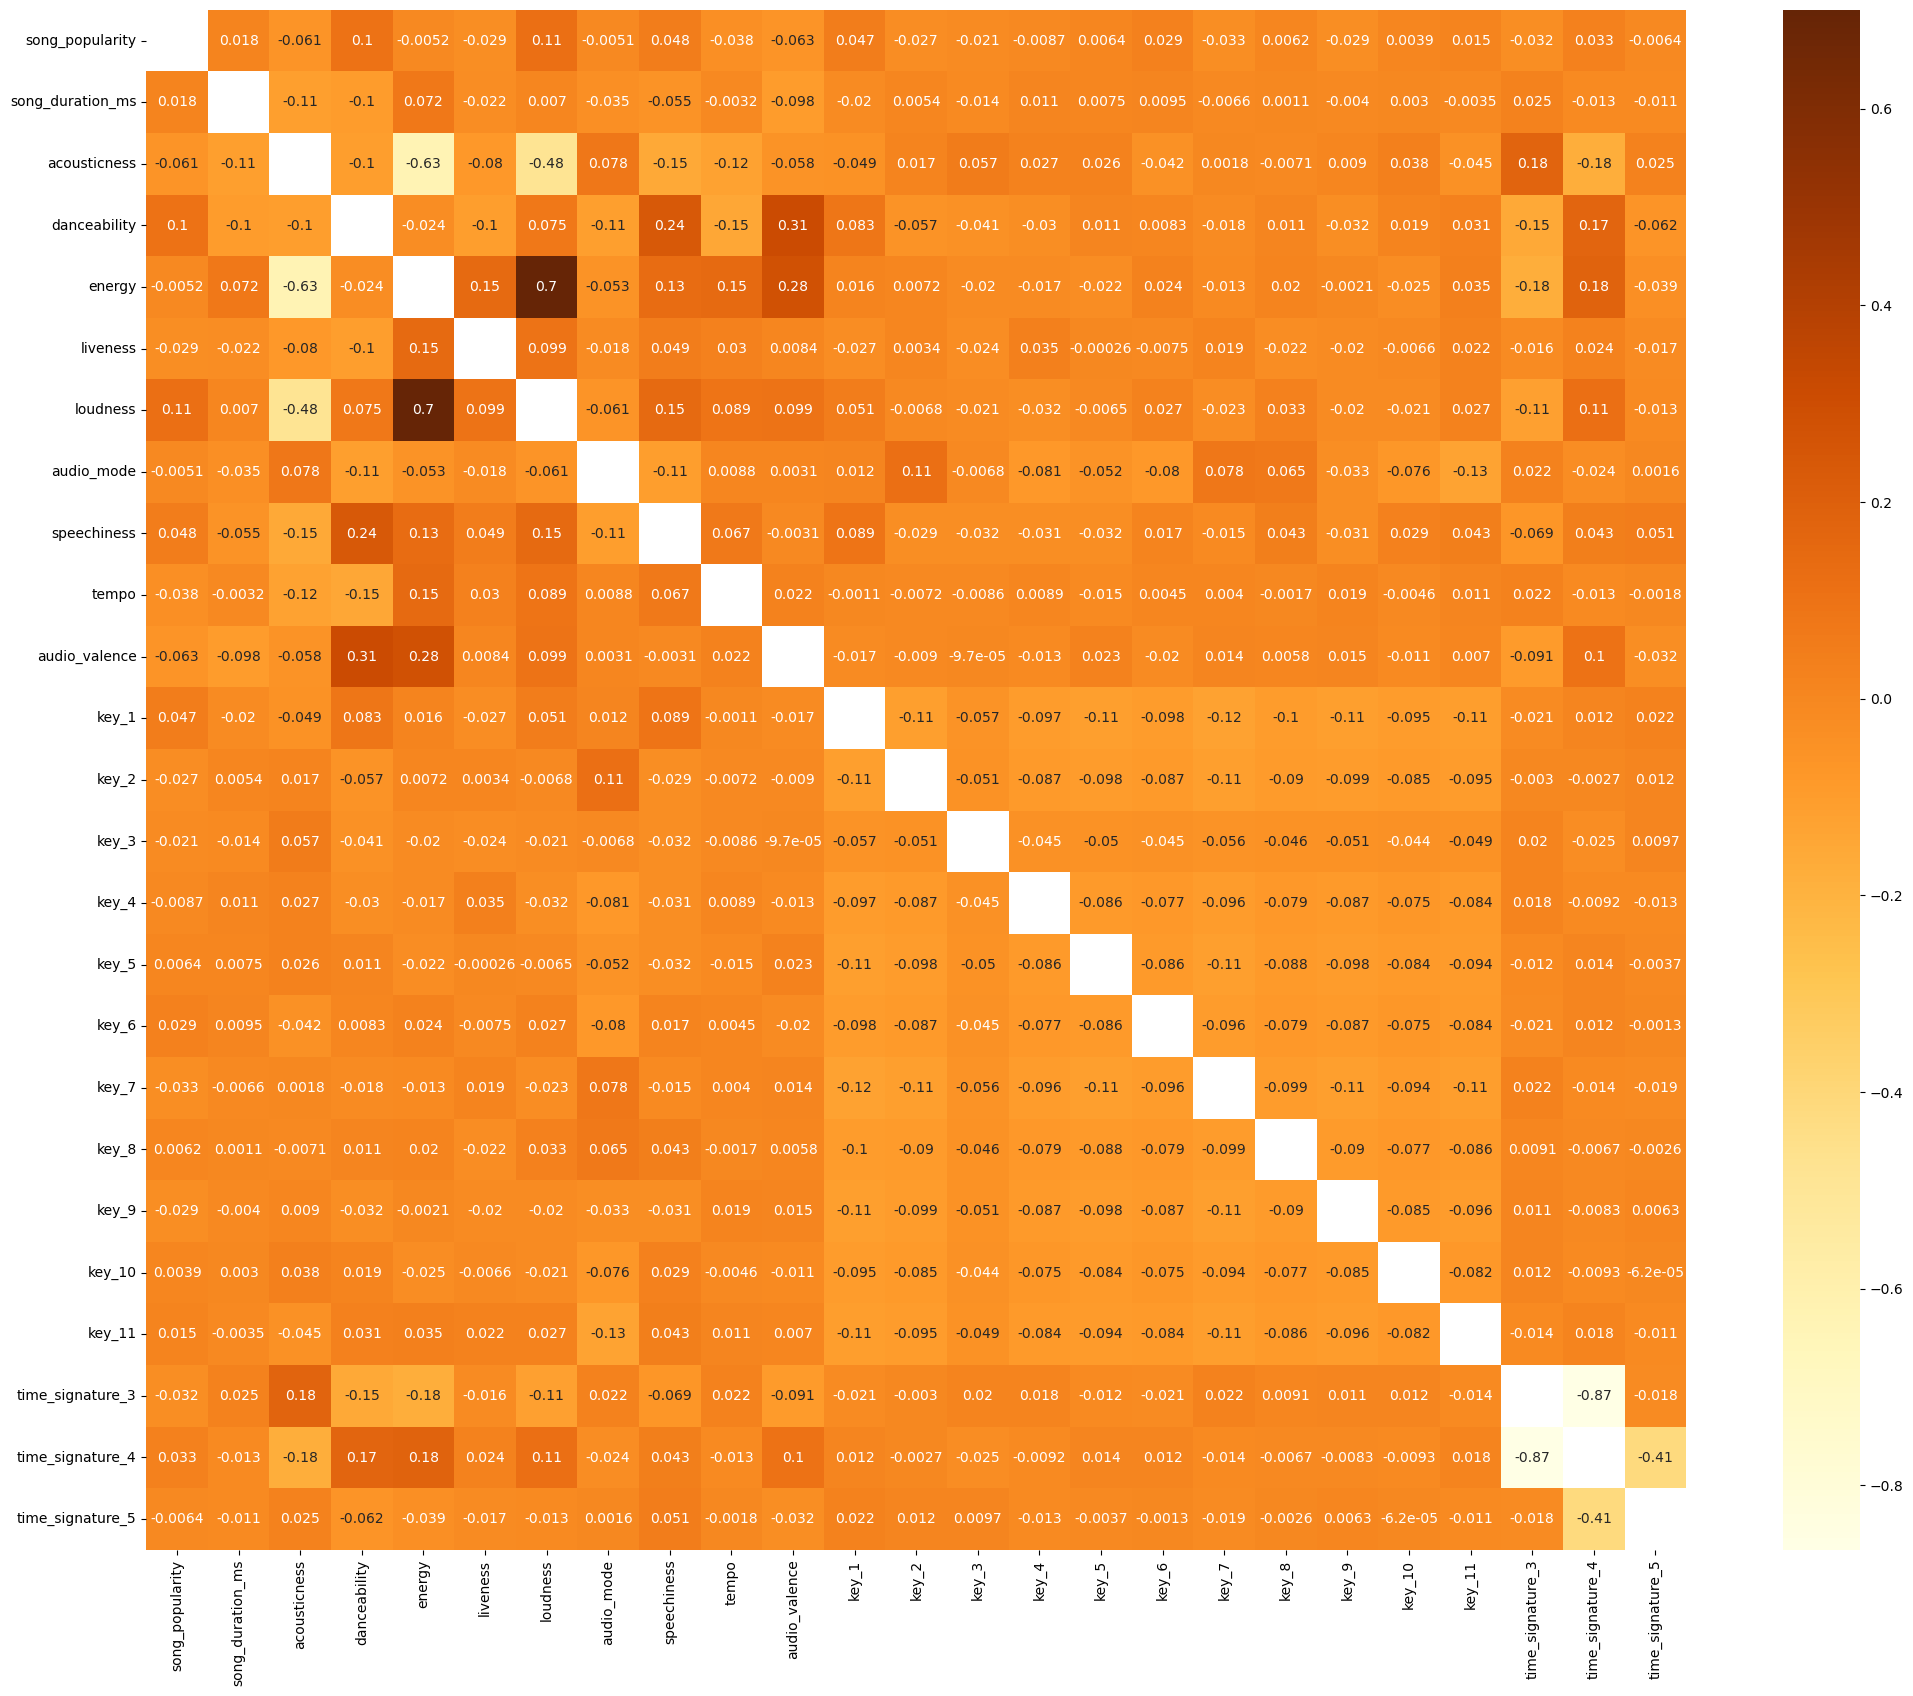

In [18]:
plt.figure(figsize=(25,20))
np.fill_diagonal(corr_matrix.values, np.nan)
sns.heatmap(df.corr(), cmap="YlOrBr", annot=True, mask=corr_matrix.isnull(), square=True)
plt.show()

In [19]:
df.drop(['energy'], axis=1, inplace=True)

In [20]:
x = df.drop([target], axis=1)
y = df[target]
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=100)

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

train_x = np.expand_dims(train_x, axis=1)
test_x = np.expand_dims(test_x, axis=1)

In [29]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_transformer_regressor(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_layers,
    dropout=0.1,
):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(1)(x)
    
    return models.Model(inputs, outputs)

input_shape = (1, train_x.shape[2])
model = build_transformer_regressor(
    input_shape=input_shape,
    head_size=128,
    num_heads=4,
    ff_dim=128,
    num_layers=6,
    dropout=0.2,
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae"],
)

#model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1, 23)]      0           []                               
                                                                                                  
 multi_head_attention_6 (MultiH  (None, 1, 23)       48663       ['input_3[0][0]',                
 eadAttention)                                                    'input_3[0][0]']                
                                                                                                  
 dropout_12 (Dropout)           (None, 1, 23)        0           ['multi_head_attention_6[0][0]'] 
                                                                                                  
 layer_normalization_12 (LayerN  (None, 1, 23)       46          ['dropout_12[0][0]']       

In [30]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
]

history = model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=10,
    batch_size=128,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/10
84/84 [==============================] - 49s 496ms/step - loss: 672.8447 - mae: 20.3387 - val_loss: 483.3616 - val_mae: 17.1889 - lr: 0.0010
Epoch 2/10
84/84 [==============================] - 41s 482ms/step - loss: 466.6385 - mae: 17.1904 - val_loss: 490.5927 - val_mae: 17.1414 - lr: 0.0010
Epoch 3/10
84/84 [==============================] - 41s 486ms/step - loss: 463.3818 - mae: 17.1423 - val_loss: 490.4005 - val_mae: 17.1429 - lr: 0.0010
Epoch 4/10
84/84 [==============================] - 40s 473ms/step - loss: 463.0402 - mae: 17.1322 - val_loss: 485.1320 - val_mae: 17.0845 - lr: 0.0010
Epoch 5/10
84/84 [==============================] - 40s 477ms/step - loss: 458.3409 - mae: 17.0455 - val_loss: 483.7411 - val_mae: 17.0455 - lr: 5.0000e-04
Epoch 6/10
84/84 [==============================] - 39s 469ms/step - loss: 454.5687 - mae: 16.9671 - val_loss: 477.6431 - val_mae: 17.0436 - lr: 5.0000e-04
Epoch 7/10
84/84 [==============================] - 41s 490ms/step - loss: 454.6

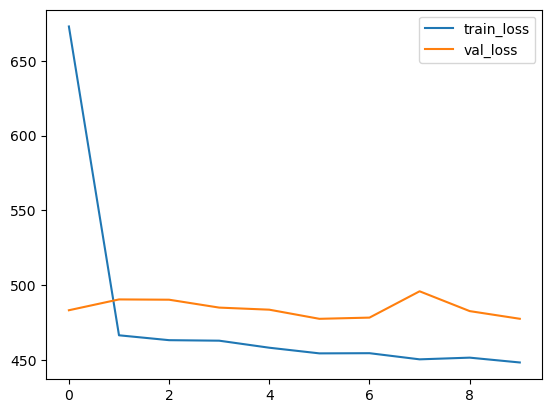

111/111 [==============================] - 1s 5ms/step
MSE: 477.6666259765625
MAE: 16.937747955322266
R2: 0.03276139497756958


In [31]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

y_pred = model.predict(test_x)

print(f"MSE: {mean_squared_error(test_y, y_pred)}")
print(f"MAE: {mean_absolute_error(test_y, y_pred)}")
print(f"R2: {r2_score(test_y, y_pred)}")

In [ ]:
df1 = df[df["song_popularity"] <= 40]
df2 = df[df["song_popularity"] >= 40]

In [ ]:
x = df1.drop([target], axis=1)
y = df1[target]
train_x1, test_x1, train_y1, test_y1 = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=100)

sns.histplot(x=train_y1, color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [ ]:
sns.histplot(x=test_y1, color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [ ]:
x_n = df2.drop([target], axis=1)
y_n = df2[target]
train_x2, test_x2, train_y2, test_y2 = train_test_split(x_n, y_n, train_size=0.75, test_size=0.25, random_state=100)

sns.histplot(x=train_y2, color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [ ]:
x = df.drop([target], axis=1)
y = df[target]
train_x, test_x, train_y, test_y = train_test_split(x_n, y_n, train_size=0.75, test_size=0.25, random_state=100)

sns.histplot(x=train_y, color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [ ]:
sns.histplot(x=test_y, color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [ ]:
regr = LinearRegression()

regr.fit(train_x2, train_y2)

pred_y = regr.predict(test_x2)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(test_y2, pred_y))
print("Mean absolute error: %.2f" % mean_absolute_error(test_y2, pred_y))
print("Coefficient of determination: %.2f" % r2_score(test_y2, pred_y))

print(train_y2.shape)
print(train_y2.shape)

#plt.scatter(test_x, test_y, color="black")
#plt.plot(test_y, pred_y, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

sns.histplot(x=pred_y, color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [ ]:
poly_reg = Pipeline([
    ('poly_features_2', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])
poly_reg.fit(train_x2, train_y2)
y_pred = poly_reg.predict(test_x2)
    
#print("Coefficients: \n", regr.coef_)
#print("Mean squared error: %.2f" % mean_squared_error(test_y, pred_y))
print("Mean absolute error: %.2f" % mean_absolute_error(test_y2, y_pred))
#print("Coefficient of determination: %.2f" % r2_score(test_y, pred_y))

In [ ]:
svr = SVR(kernel="linear", C=0.01, epsilon=0.01)
svr.fit(train_x2, train_y2)
y_rbf = svr.predict(test_x2)
    
print(y_rbf.shape, test_y1.shape)
    
print("Mean squared error: %.2f" % mean_squared_error(test_y2, y_rbf))
print("Mean absolute error: %.2f" % mean_absolute_error(test_y2, y_rbf))
print("Coefficient of determination: %.2f" % r2_score(test_y2, y_rbf))

sns.histplot(x=y_rbf, color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [ ]:
svr_poly = SVR(kernel="poly", C=10, epsilon=0.01, degree=3)
svr_poly.fit(train_x2, train_y2)
y_poly = svr_poly.predict(test_x2)
print("Mean squared error: %.2f" % mean_squared_error(test_y2, y_poly))
print("Mean absolute error: %.2f" % mean_absolute_error(test_y2, y_poly))
print("Coefficient of determination: %.2f" % r2_score(test_y2, y_poly))

sns.histplot(x=y_poly, color='orange', label='Data' , fill =True , kde = True)
plt.show()

In [ ]:
svr_rbf = SVR(kernel="rbf", C=0.01, epsilon=1)
svr_rbf.fit(train_x2, train_y2)
y_rbf = svr_rbf.predict(test_x2)
print("Mean squared error: %.2f" % mean_squared_error(test_y2, y_rbf))
print("Mean absolute error: %.2f" % mean_absolute_error(test_y2, y_rbf))
print("Coefficient of determination: %.2f" % r2_score(test_y2, y_rbf))

In [ ]:
a = []
for i in range(1, 90):
    tree_reg = DecisionTreeRegressor(max_depth=i)
    tree_reg.fit(train_x, train_y)
    
    y_dtr = tree_reg.predict(test_x)
    #print("Mean squared error: %.2f" % mean_squared_error(test_y, y_dtr))
    print("Mean absolute error: %.2f" % mean_absolute_error(test_y, y_dtr))
    a.append(mean_absolute_error(test_y, y_dtr))
    #print("Coefficient of determination: %.2f" % r2_score(test_y, y_dtr))
print(min(a))

In [ ]:
rfr = RandomForestRegressor(n_estimators=1000, max_leaf_nodes=32, n_jobs=-1)
rfr.fit(train_x1, train_y1)
y_rfr = rfr.predict(test_x1)
imp = rfr.feature_importances_
print("Mean squared error: %.2f" % mean_squared_error(test_y1, y_rfr))
print("Mean absolute error: %.2f" % mean_absolute_error(test_y1, y_rfr))
print("Coefficient of determination: %.2f" % r2_score(test_y1, y_rfr))
print(imp)

In [ ]:
rfr = GradientBoostingRegressor(random_state=0, learning_rate=0.01, n_estimators=1000, max_depth=10)
rfr.fit(train_x2, train_y2)
y_rfr = rfr.predict(train_x2)
print("Mean squared error: %.2f" % mean_squared_error(train_y2, y_rfr))
print("Mean absolute error: %.2f" % mean_absolute_error(train_y2, y_rfr))
print("Coefficient of determination: %.2f" % r2_score(train_y2, y_rfr))

sns.histplot(x=y_rfr, color='orange', label='Data' , fill =True , kde = True)
plt.show()